In [93]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from patsy import dmatrices
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

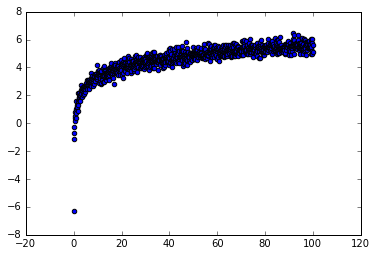

In [26]:
# Challenge 1
nsamp = 1000
df = pd.DataFrame()

df['x'] = np.linspace(0.001, 100, nsamp)

B0 = 1
B1 = 1
epsilon = np.random.randn(nsamp)*0.3
df['y'] = B0 + B1*np.log(x) + epsilon


ax = plt.scatter(df['x'],df['y'])
plt.show()

   Intercept         x  np.power(x, 2)
0          1  0.001000        0.000001
1          1  0.101099        0.010221
2          1  0.201198        0.040481
3          1  0.301297        0.090780
4          1  0.401396        0.161119


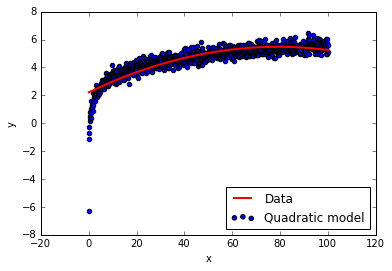

In [59]:
# Quadratic model
y, X = dmatrices('y ~ x + np.power(x,2)', data=df, return_type='dataframe')
print X.head()

model = LinearRegression()
model.fit(X, y)

ax = plt.scatter(X['x'],y)
ax = plt.plot(X['x'], model.predict(X), 'r', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Data', 'Quadratic model'], loc='lower right')
plt.show()


   Intercept         x  np.log(x)
0          1  0.001000  -6.907755
1          1  0.101099  -2.291654
2          1  0.201198  -1.603465
3          1  0.301297  -1.199658
4          1  0.401396  -0.912806


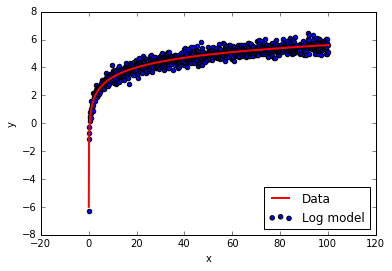

In [61]:
# Log model
y, X = dmatrices('y ~ x + np.log(x)', data=df, return_type='dataframe')
print X.head()

model = LinearRegression()
model.fit(X, y)

ax = plt.scatter(X['x'],y)
ax = plt.plot(X['x'], model.predict(X), 'r', linewidth=2)
plt.legend(['Data', 'Log model'], loc='lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [112]:
# Challenge 2

nsamp = 100
x = np.linspace(0.001, 100, nsamp)
B0 = 1
B1 = 1
B2 = 1.5
epsilon = np.random.randn(nsamp)*0.3
f = lambda x: B0 + B1*x + B2*np.power(x,2) + epsilon
y = f(x)

df = pd.DataFrame()
df['x'] = x
df['y'] = y

y, X = dmatrices('y ~ x + I(x*x)', data=df, return_type='dataframe')
print X.head()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.333,random_state=2)

model = LinearRegression()
model.fit(x_train, y_train)

print "Train error: %.4f"%mean_squared_error(model.predict(x_train), y_train)
print "Test error: %.4f"%mean_squared_error(model.predict(x_test), y_test)

   Intercept         x   I(x * x)
0          1  0.001000   0.000001
1          1  1.011091   1.022305
2          1  2.021182   4.085176
3          1  3.031273   9.188614
4          1  4.041364  16.332620
Train error: 0.1032
Test error: 0.1018


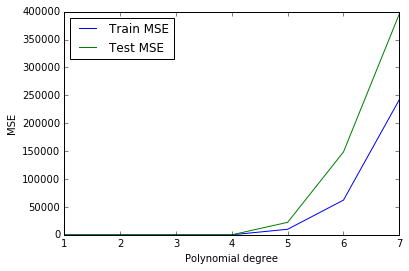

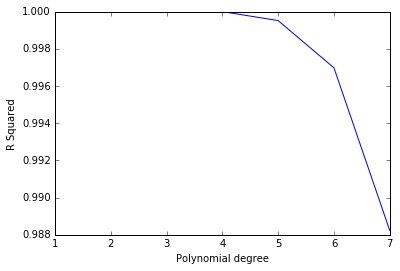

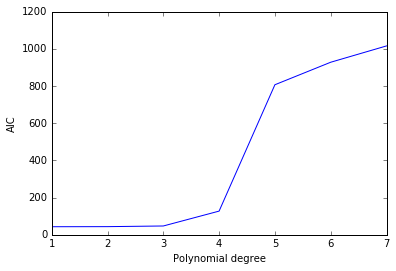

In [114]:
# Challenge 3

# source: http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#example-linear-model-plot-polynomial-interpolation-py

from statsmodels.api import OLS

mse_train = []
mse_test = []
rsquared = []
aic = []

degrees = range(1,8)
for degree in degrees:
    poly = PolynomialFeatures(degree)
    xtr = poly.fit_transform(x_train)
    xte = poly.fit_transform(x_test)
    
    
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    #model.fit(x_train, y_train)
    
    model = OLS(y_train, xtr).fit()
    
    mse_train.append(mean_squared_error(model.predict(xtr), y_train))
    mse_test.append(mean_squared_error(model.predict(xte), y_test))
    rsquared.append(model.rsquared)
    aic.append(model.aic)
plt.plot(degrees, mse_train)
plt.plot(degrees, mse_test)
plt.legend(['Train MSE', 'Test MSE'], loc='upper left')
plt.ylabel('MSE')
plt.xlabel('Polynomial degree')
plt.show()
plt.plot(degrees, rsquared)
plt.ylabel('R Squared')
plt.xlabel('Polynomial degree')
plt.show()
plt.plot(degrees, aic)
plt.ylabel('AIC')
plt.xlabel('Polynomial degree')
plt.show()

    
    


   Intercept         x  np.power(x, 2)
0          1  0.001000        0.000001
1          1  0.335445        0.112523
2          1  0.669890        0.448752
3          1  1.004334        1.008688
4          1  1.338779        1.792330


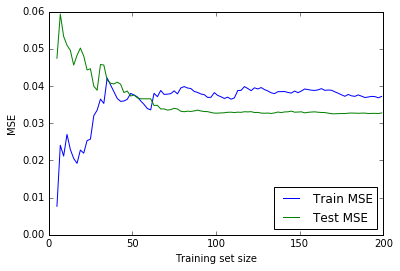

In [147]:
# Challenge 4: learning curve

nsamp = 300
x = np.linspace(0.001, 100, nsamp)
B0 = 1
B1 = 1
B2 = 1.5
epsilon = np.random.randn(nsamp)*0.2
f = lambda x: B0 + B1*x + B2*np.power(x,2) + epsilon
y = f(x)

df = pd.DataFrame()
df['x'] = x
df['y'] = y

y, X = dmatrices('y ~ x + np.power(x, 2)', data=df, return_type='dataframe')
print X.head()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=2)

mse_train = []
mse_test = []
ntrs = range(5,len(x_train),2)
for ntr in ntrs:
    model = LinearRegression()
    model.fit(x_train[:ntr], y_train[:ntr])
    mse_train.append(mean_squared_error(model.predict(x_train[:ntr]), y_train[:ntr]))
    mse_test.append(mean_squared_error(model.predict(x_test), y_test))
    
plt.plot(ntrs, mse_train)
plt.plot(ntrs, mse_test)
plt.legend(['Train MSE', 'Test MSE'], loc='lower right')
plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.show()